# DTFF_project

## 1. Data Importation and Cleaning

In [38]:
# Import useful modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [39]:
# Load the product annoucement dates from Excel sheet --> don't forget to check current directory
df = pd.read_excel('announcements.xlsx')
df.head()

,Company,Date,Announcement
0,APPL,2014-09-09,Iphone 6
1,APPL,2015-03-09,"Apple Watch, MacBook (12-inch)"
2,APPL,2015-09-09,"iPhone 6s, iPhone 6s Plus, iPad Pro"
3,APPL,2016-03-21,"iPhone SE, 9.7-inch iPad Pro"
4,APPL,2016-06-13,"iOS 10, macOS Sierra, watchOS 3 (WWDC)"


In [40]:
print(df.shape)
print(df.dtypes)
print(df.columns) 
# montre les parties utilisables du dataframe df 

(184, 3)
Company                  object
Date             datetime64[ns]
Announcement             object
dtype: object
Index(['Company', 'Date ', 'Announcement '], dtype='object')


In [41]:
# Change all column names because there seems to be unexpected spaces in the columnn names
df.columns = ['Name', 'Date', 'Announcement']

In [42]:
# Load the stock prices 
df_1 = pd.read_excel('Stock_Prices.xlsx')
df_1.head()

,Name,2013-12-31 00:00:00,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,2014-01-08 00:00:00,2014-01-09 00:00:00,2014-01-10 00:00:00,...,2023-12-18 00:00:00,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00
0,APPL,17691.13,17691.13,17442.33,17059.20,17152.22,17029.47,17137.40,16918.52,16805.66,...,197291.60,198349.10,196224.10,196073.00,194985.30,194985.30,194431.30,194532.00,194965.10,193907.60
1,NVDA,1004.27,1004.27,994.24,982.33,995.49,1011.79,1025.58,987.34,986.09,...,133078.10,131821.10,127853.50,130189.30,129764.20,129764.20,130957.40,131324.10,131603.10,131603.10
2,MSFT,52155.35,52155.35,51806.81,51458.27,50370.83,50761.19,49855.00,49534.35,50245.36,...,616923.50,617933.60,613563.20,618397.10,620118.90,620118.90,620251.10,619274.60,621277.70,622535.90
3,AMZN,20363.73,20363.73,20321.87,20243.74,20100.25,20324.92,20523.57,20477.09,20306.04,...,157348.10,157062.10,155356.60,157113.20,156684.30,156684.30,156674.00,156602.50,156643.40,155172.80
4,GOOG,1116.97,1116.97,1109.40,1101.31,1113.59,1135.05,1137.42,1126.47,1126.41,...,5408.61,5442.47,5509.78,5592.62,5635.23,5635.23,5636.43,5590.63,5585.05,5563.55


In [43]:
# Reshaping the daily stock prices DataFrame --> here, 'Date' and 'StockPrice' are new variables
df_1 = df_1.melt(id_vars=['Name'], 
                    var_name='Date', 
                    value_name='StockPrice')
df_1.head()

,Name,Date,StockPrice
0,APPL,2013-12-31 00:00:00,17691.13
1,NVDA,2013-12-31 00:00:00,1004.27
2,MSFT,2013-12-31 00:00:00,52155.35
3,AMZN,2013-12-31 00:00:00,20363.73
4,GOOG,2013-12-31 00:00:00,1116.97


In [44]:
print(df_1.shape)
print(df_1.dtypes)
print(df_1.columns) 

(26090, 3)
Name           object
Date           object
StockPrice    float64
dtype: object
Index(['Name', 'Date', 'StockPrice'], dtype='object')


In [45]:
# Make sure 'Date' columns for both dataframes are datetime type
df['Date'] = pd.to_datetime(df['Date'])
df_1['Date'] = pd.to_datetime(df_1['Date'])

In [46]:
# Merge both dataframes on 'Name' and 'Date'
# /!\ Keep in mind that we will lose the 2024 announcement dates during the merging because the stock prices ends in 2023
df = pd.merge(df, df_1, on=['Name', 'Date'], how='right')

# Here we just want to sort by company names and dates in order to facilitate the later computations, we also reset the index
df = df.sort_values(by=['Name', 'Date']).reset_index(drop=True)

df.head()

,Name,Date,Announcement,StockPrice
0,AMZN,2013-12-31,NaN,20363.73
1,AMZN,2014-01-01,NaN,20363.73
2,AMZN,2014-01-02,NaN,20321.87
3,AMZN,2014-01-03,NaN,20243.74
4,AMZN,2014-01-06,NaN,20100.25


In [47]:
print(df.shape)
print(df.dtypes)
print(df.columns) 

(26090, 4)
Name                    object
Date            datetime64[ns]
Announcement            object
StockPrice             float64
dtype: object
Index(['Name', 'Date', 'Announcement', 'StockPrice'], dtype='object')


In [48]:
# Here is to make sure that the merging did its work and there is not only nans in the 'Announcement' column
non_nan_announcement = df[df['Announcement'].notna()]
len(non_nan_announcement)

120

In [49]:
# Count missing values for each column
missing_values = df.isna().sum()

# Identify potential rows where the 'StockPrice' has a value of zero --> would be inconsistent
zero_values = df[df['StockPrice'] == 0.0]

# Identify potential rows where the 'StockPrice' has a negative value
negative_values = df[df['StockPrice'] < 0]

print(missing_values)
print(zero_values)
print(negative_values)

Name                0
Date                0
Announcement    25970
StockPrice          0
dtype: int64
Empty DataFrame
Columns: [Name, Date, Announcement, StockPrice]
Index: []
Empty DataFrame
Columns: [Name, Date, Announcement, StockPrice]
Index: []


## 2. Compute Daily Returns and Volatilities

In [50]:
# Calculate daily returns and rolling annualized volatility for each firm independently

df['Daily_Return'] = df.groupby('Name')['StockPrice'].pct_change()
df['Rolling_Volatility'] = df.groupby('Name')['Daily_Return'].rolling(window=20).std().reset_index(0, drop=True)* np.sqrt(252)

df.head()

,Name,Date,Announcement,StockPrice,Daily_Return,Rolling_Volatility
0,AMZN,2013-12-31,NaN,20363.73,NaN,NaN
1,AMZN,2014-01-01,NaN,20363.73,0.000000,NaN
2,AMZN,2014-01-02,NaN,20321.87,-0.002056,NaN
3,AMZN,2014-01-03,NaN,20243.74,-0.003845,NaN
4,AMZN,2014-01-06,NaN,20100.25,-0.007088,NaN


In [51]:
# Count missing values for each column
missing_values = df.isna().sum()

# we get 10 nan values for the returns because there is 10 companies so the first return is always nan
# we get 200 = 20*10 for the rolling volatility because it must contain 20 elements before computing the first volatility
print(missing_values)

Name                      0
Date                      0
Announcement          25970
StockPrice                0
Daily_Return             10
Rolling_Volatility      200
dtype: int64


In [52]:
# Drop rows where 'Daily_Return' or 'Rolling_Volatility' is NaN
# /!\ Keep in mind that we will lose all the first 20 observations for each firms so 200 rows in total
df = df.dropna(subset=['Daily_Return', 'Rolling_Volatility'])

# Display the first few rows
df.head()

,Name,Date,Announcement,StockPrice,Daily_Return,Rolling_Volatility
20,AMZN,2014-01-28,NaN,20141.10,0.021099,0.197817
21,AMZN,2014-01-29,NaN,19618.72,-0.025936,0.217440
22,AMZN,2014-01-30,NaN,20579.22,0.048958,0.282289
23,AMZN,2014-01-31,NaN,18316.08,-0.109972,0.484372
24,AMZN,2014-02-03,NaN,17675.74,-0.034961,0.496284


In [53]:
# Count missing values for each column
missing_values = df.isna().sum()

# everything seemed to have worked as expected
print(missing_values)

Name                      0
Date                      0
Announcement          25770
StockPrice                0
Daily_Return              0
Rolling_Volatility        0
dtype: int64


## 3. Descriptive Statistics and Data Visualization

In [54]:
# Group by 'Name' (Firm) and select the relevant columns
descriptive_stats = df.groupby('Name')[['Daily_Return', 'Rolling_Volatility']].agg(['mean', 'std'])

# Display the descriptive statistics
descriptive_stats

Daily_Return           Rolling_Volatility          
              mean       std               mean       std
Name                                                     
AMZN      0.001008  0.020572           0.297468  0.137421
APPL      0.001087  0.017588           0.252589  0.121144
AVGO      0.001501  0.021550           0.313555  0.141604
GOOG      0.000776  0.017279           0.251213  0.115213
META      0.001001  0.023150           0.325019  0.177339
MSFT      0.001113  0.016755           0.239529  0.122611
NVDA      0.002308  0.028763           0.413733  0.195490
TECHY     0.000704  0.021892           0.319505  0.136987
TSLA      0.001783  0.034369           0.500945  0.213008
TSMC      0.000910  0.016182           0.243874  0.081671

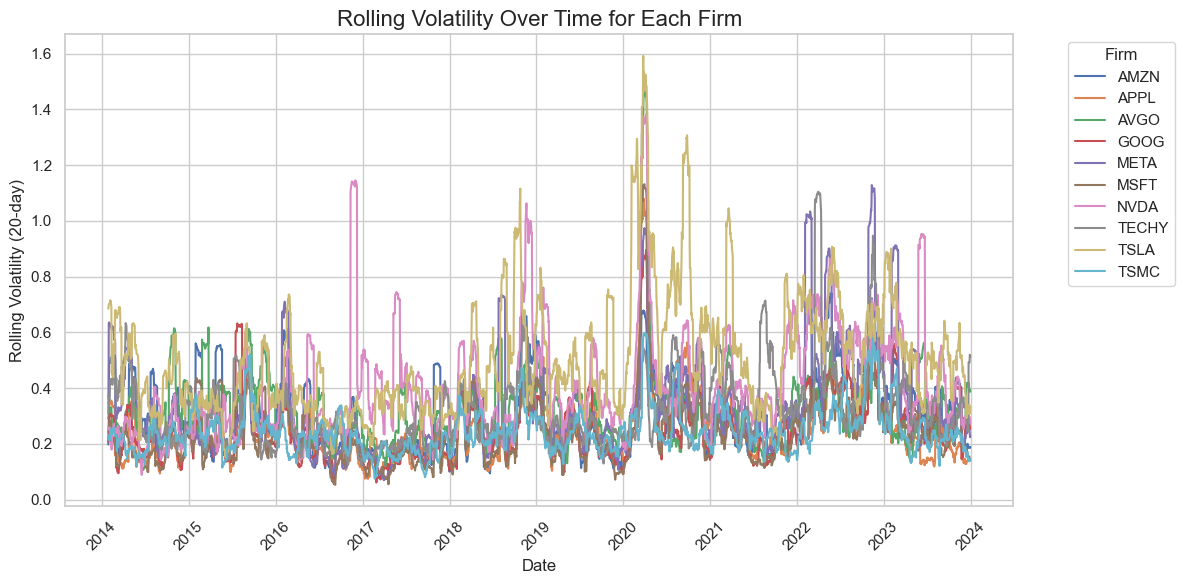

In [55]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Plot the rolling volatility for each firm
plt.figure(figsize=(12, 6))

# Loop through each unique firm and plot the rolling volatility
for firm in df['Name'].unique():
    firm_data = df[df['Name'] == firm]
    plt.plot(firm_data['Date'], firm_data['Rolling_Volatility'], label=firm)

# Customize the plot
plt.title('Rolling Volatility Over Time for Each Firm', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Volatility (20-day)', fontsize=12)
plt.legend(title='Firm', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside
plt.xticks(rotation=45)  # Rotate date labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

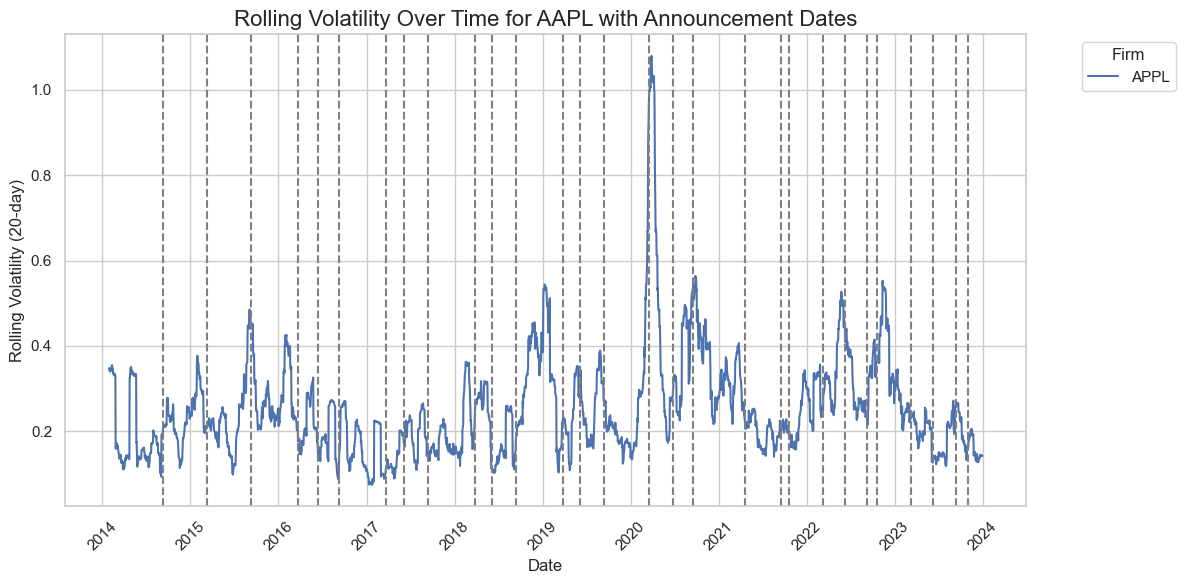

In [56]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Plot the rolling volatility for each firm
plt.figure(figsize=(12, 6))

# Loop through each unique firm and plot the rolling volatility
firm_data = df[df['Name'] == 'APPL']
plt.plot(firm_data['Date'], firm_data['Rolling_Volatility'], label='APPL')

# Highlight the announcement dates by adding vertical lines
announcement_data = df[df['Name'] == 'APPL'].dropna(subset=['Announcement'])
for _, row in announcement_data.iterrows():
    plt.axvline(x=row['Date'], color='grey', linestyle='--')

# Customize the plot
plt.title('Rolling Volatility Over Time for AAPL with Announcement Dates', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Volatility (20-day)', fontsize=12)
plt.legend(title='Firm', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside
plt.xticks(rotation=45)  # Rotate date labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

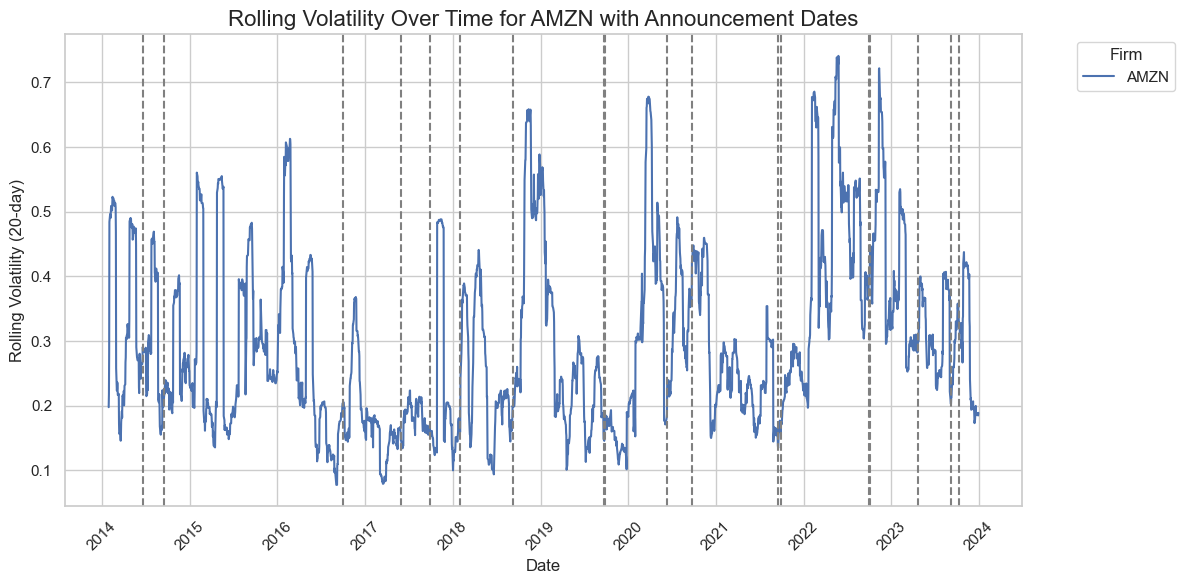

In [57]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Plot the rolling volatility for each firm
plt.figure(figsize=(12, 6))

# Loop through each unique firm and plot the rolling volatility
firm_data = df[df['Name'] == 'AMZN']
plt.plot(firm_data['Date'], firm_data['Rolling_Volatility'], label='AMZN')

# Highlight the announcement dates by adding vertical lines
announcement_data = df[df['Name'] == 'AMZN'].dropna(subset=['Announcement'])
for _, row in announcement_data.iterrows():
    plt.axvline(x=row['Date'], color='grey', linestyle='--')

# Customize the plot
plt.title('Rolling Volatility Over Time for AMZN with Announcement Dates', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Volatility (20-day)', fontsize=12)
plt.legend(title='Firm', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside
plt.xticks(rotation=45)  # Rotate date labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

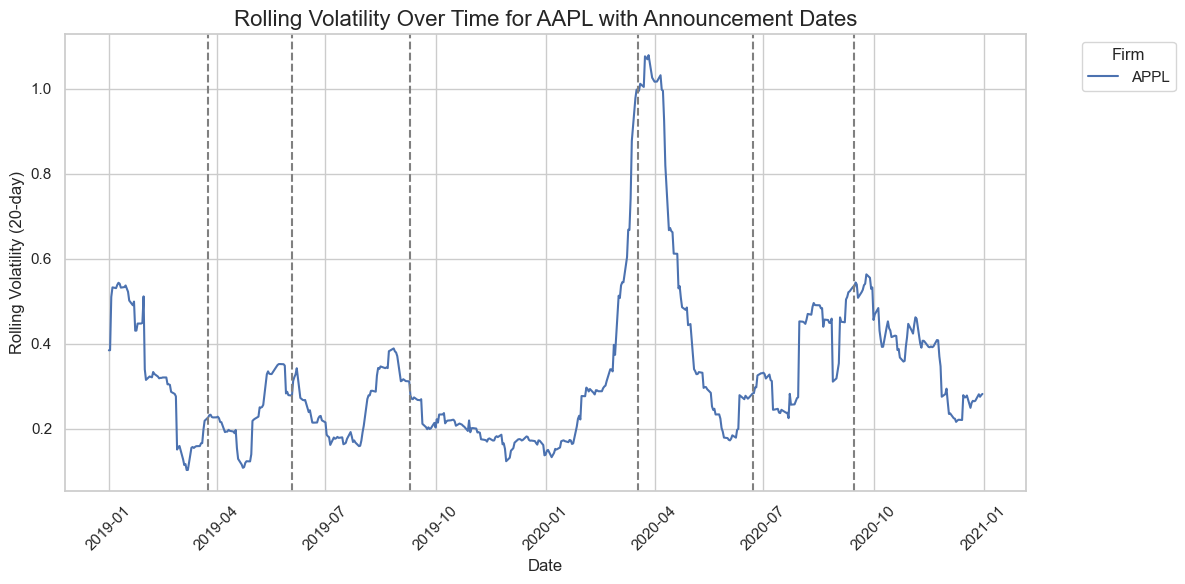

In [58]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Loop through each unique firm and plot the rolling volatility
firm_data = df[(df['Name'] == 'APPL') & (df['Date'].dt.year.isin([2019, 2020]))]
plt.plot(firm_data['Date'], firm_data['Rolling_Volatility'], label='APPL')

# Highlight the announcement dates
announcement_data = df[
    (df['Name'] == 'APPL') & 
    (df['Date'].dt.year.isin([2019, 2020]))
].dropna(subset=['Announcement'])

for _, row in announcement_data.iterrows():
    plt.axvline(x=row['Date'], color='grey', linestyle='--')

# Customize the plot
plt.title('Rolling Volatility Over Time for AAPL with Announcement Dates', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Volatility (20-day)', fontsize=12)
plt.legend(title='Firm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Plot data for both companies
for company in ['APPL', 'AMZN']:
    # Get company data
    firm_data = df[
        (df['Name'] == company) & 
        (df['Date'].dt.year.isin([2019, 2020]))
    ]
    plt.plot(firm_data['Date'], firm_data['Rolling_Volatility'], label=company)
    
    # Highlight announcement dates for each company
    announcement_data = df[
        (df['Name'] == company) & 
        (df['Date'].dt.year.isin([2019, 2020]))
    ].dropna(subset=['Announcement'])
    
    # Use different line styles for each company's announcements
    line_style = '--' if company == 'APPL' else ':'
    line_color = 'orange' if company == 'APPL' else 'blue'
    
    for _, row in announcement_data.iterrows():
        plt.axvline(x=row['Date'], color=line_color, linestyle=line_style, alpha=0.5)

# Customize the plot
plt.title('Rolling Volatility Over Time for AAPL and AMZN with Announcement Dates', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Volatility (20-day)', fontsize=12)
plt.legend(title='Firms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 4. Linear Regression